## Neural Network Classification in TensorFlow

* Architecture of a neural network **classification** model
* Input shapes and output shapes of a **classification** model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
 * Creating a model, compiling a model, fiiting a model, evaluating a model
* Different **classification** evaluation methods
* Saving and loading models

👁️ Andre Karpathy - [A recipe for training Nueral Networks](https://karpathy.github.io/2019/04/25/recipe/)

### Creating Data to view and fit

We can do a small prerehearsal model before rehearsal

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let`s visualize data to better understand it

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0],'X1':X[:, 1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


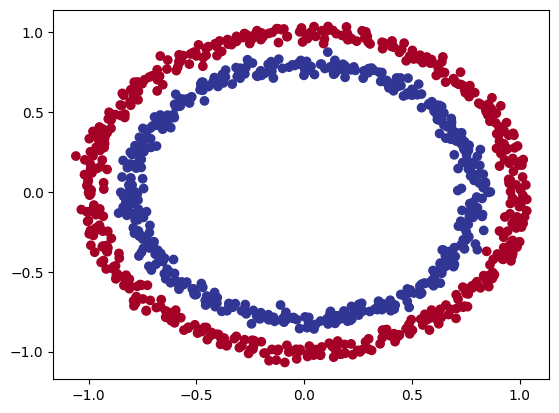

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


We want a model to predict the line between red and blue

👉 [playground.tensorflow.org](https://playground.tensorflow.org/)

### Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [9]:
# Import Tensorflow
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed (42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 1.9059 - accuracy: 0.4620
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7344 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4910


In [11]:
# Improve our model training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our mdel is getting around 50% accuracy... it's performing as if it's guessing

So let's add one more layer and keep training for longer...

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932925581932068, 0.5]

### Improving our model

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939535140991211, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unnique class falls)

In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing multiclass classification


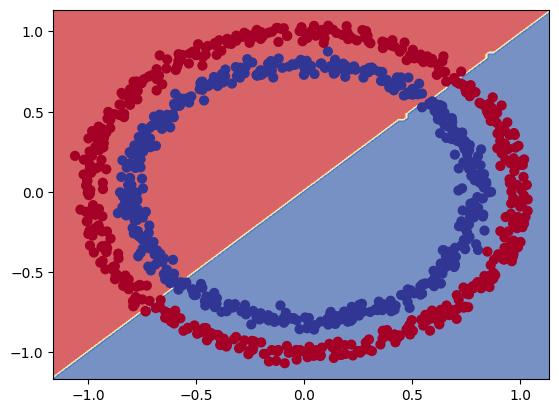

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [17]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]




In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 408.3033 - mae: 408.3033
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 293.5914 - mae: 293.5914
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 182.0010 - mae: 182.0010
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 67.6527 - mae: 67.6527
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.9595 - mae: 71.9595
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 88.3302 - mae: 88.3302
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 59.2543 - mae: 59.2543
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 46.4608 - mae: 46.4608
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.5322 - mae: 47.5322
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.9284 - mae: 42.9284
Epoch 11/100
5/5 [==============================] - 

2/2 [==============================] - 0s 5ms/step


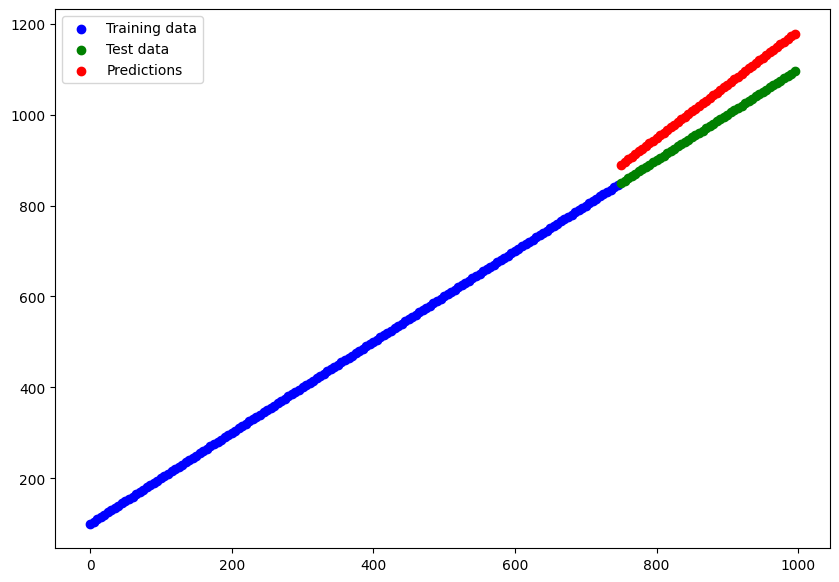

In [19]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### The missing piece: Non-Linearity

🤔 What could you draw if you had an unlimited amount of straight (linear) and non-straight (non-linear) lines?

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2 Compile our model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3 Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.7617 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.6653 - accuracy: 0.4994
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6283 - accuracy: 0.4982
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5674 - accuracy: 0.4996
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4574 - accuracy: 0.4998
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3881 - accuracy: 0.4979
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3599 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3620 - accuracy: 0.4977
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 4.3575 - accuracy: 0.4988
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3351 - accuracy: 0.5009
Epoch 11/

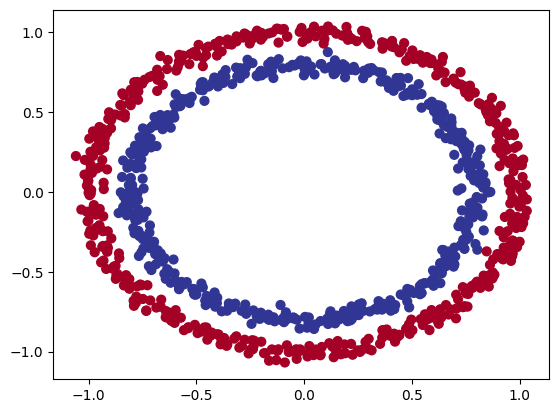

In [21]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


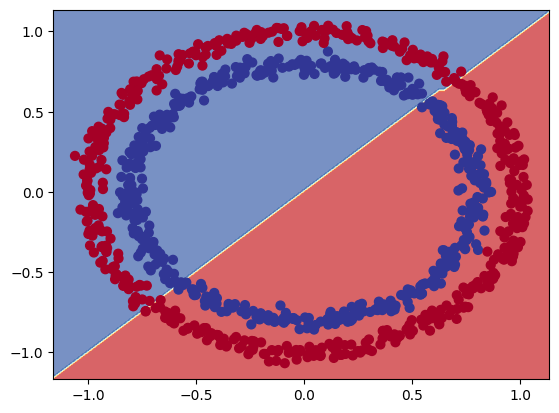

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let`s try build our first model without linear activation. Starting with ReLU

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history_2 = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.5030
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.4910
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4860
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4870
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4820
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4810
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4850
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4830
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4740
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4730
Epoch 11/

In [24]:
# Evaluate model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9580


[0.13632120192050934, 0.9580000042915344]

313/313 [==============================] - 1s 3ms/step
doing binary classification


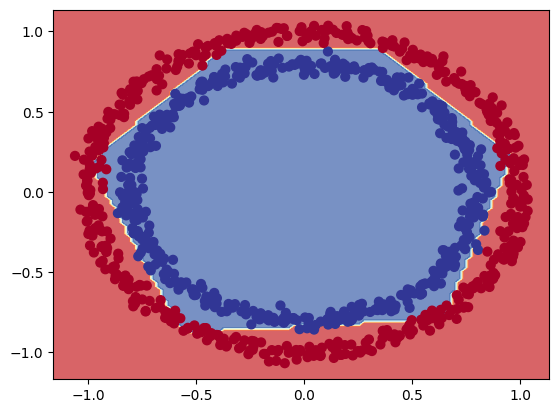

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_6, X, y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: whata data did the model learn on and what data did we predict on?

👁️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Time to see in action non-linear functions

In [26]:
# Create a toy tensor (similar to the data que pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

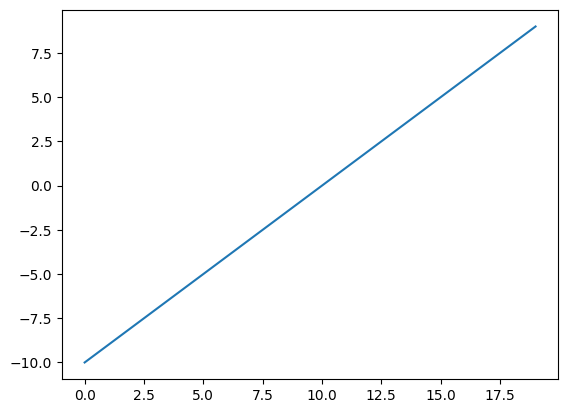

In [27]:
# Visualize our toy tensor
plt.plot(A)

In [28]:
# Let's start by replicating a sigmoid function: sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

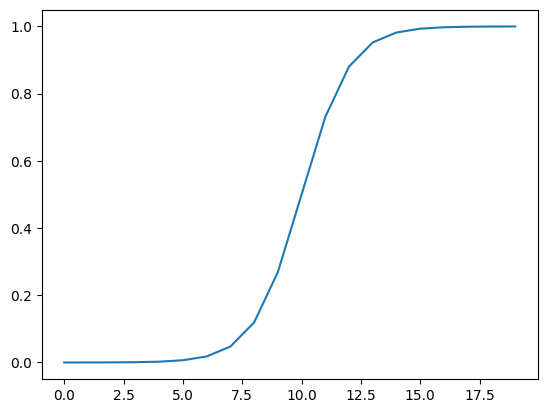

In [29]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Recreate the ReLU function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

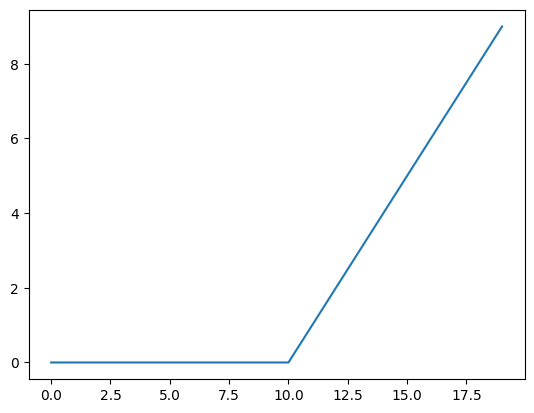

In [31]:
# Plot RELU_modified tensor
plt.plot(relu(A));

In [32]:
# Try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Evaluating and improving our classification

We need to create a training and a test set

In [33]:
# Check how many examples
len(X)

1000

In [34]:
# Split into train and test set indexing
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [43]:
# Let's recrette a model to fit on the training data
# and evaluate in the test model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=75)

Epoch 1/75
25/25 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.4963
Epoch 2/75
25/25 [==============================] - 0s 6ms/step - loss: 0.6827 - accuracy: 0.5487
Epoch 3/75
25/25 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.5425
Epoch 4/75
25/25 [==============================] - 0s 7ms/step - loss: 0.6690 - accuracy: 0.5725
Epoch 5/75
25/25 [==============================] - 0s 5ms/step - loss: 0.6638 - accuracy: 0.5738
Epoch 6/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.5738
Epoch 7/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.6137
Epoch 8/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6100
Epoch 9/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7375
Epoch 10/75
25/25 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8075
Epoch 11/75
25/25 [

In [44]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 1.0000


[0.012246377766132355, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


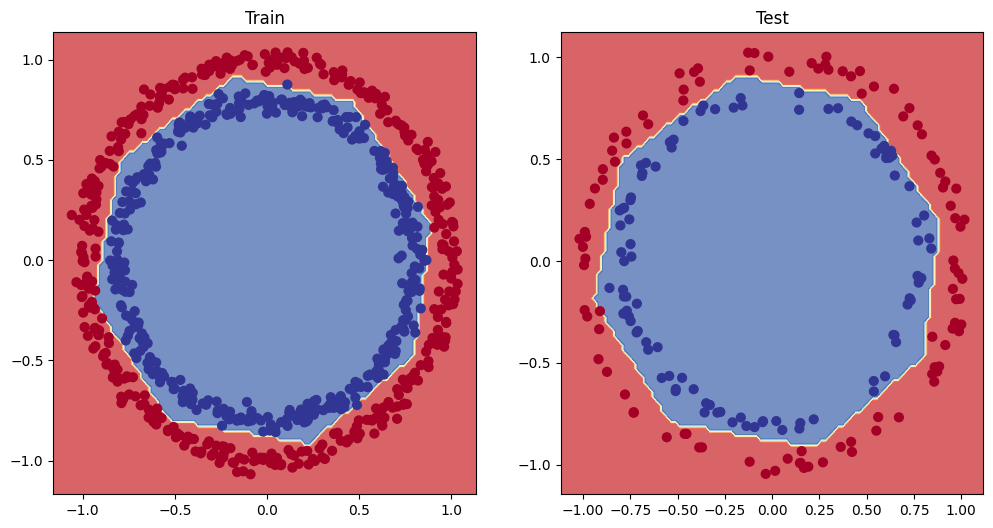

In [45]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)